In [ ]:
import torch
import os
import sys
import time
import torch
import torch.nn as nn


import numpy as np
import nibabel as nib
from torch.utils.data import Dataset
from torchvision import transforms
from random import randint

from scipy import ndimage

from torch.utils.data import DataLoader
import glob
!pip install SimpleITK
import SimpleITK as sitk
import random
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 30.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -u "/content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/normal1.zip" -d "/content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA"

Archive:  /content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/normal1.zip
 extracting: /content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/Normal-001/DTI/Normal001-DTI.mha  
 extracting: /content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/Normal-001/MRA/Normal001-MRA.mha  
 extracting: /content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/Normal-001/T1-Flash/Normal001-T1-Flash.mha  
 extracting: /content/drive/MyDrive/3dBrainTumorSegmentation/LausanneMRA/Normal-001/T2/Normal001-T2.mha  


In [ ]:
!pip install itk

import itk

file_name = '/content/drive/MyDrive/3dBrainTumorSegmentation/TubeTKMRA/training/Normal-002/AuxillaryData/VascularNetwork.tre'

Dimension = 3
reader = itk.SpatialObjectReader[Dimension].New()
reader.SetFileName(file_name)
reader.Update()

tubes = reader.GetGroup()
print(tubes)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 17.2 MB 5.1 MB/s 
     |████████████████████████████████| 26.2 MB 50.3 MB/s 
     |████████████████████████████████| 27.3 MB 1.3 MB/s 
     |████████████████████████████████| 75.9 MB 1.2 MB/s 
     |████████████████████████████████| 83.6 MB 80 kB/s 
     |████████████████████████████████| 60.0 MB 1.1 MB/s 
GroupSpatialObject (0xa440480)
  GroupSpatialObject(0xa440480)
  RTTI typeinfo:   itk::GroupSpatialObject<3u>
  Reference Count: 3
  Modified Time: 139998
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  Id:236
  TypeName:GroupSpatialObject
  ParentId:-1
  Parent:0
  LargestPossibleRegion:ImageRegion (0xa440598)
  Dimension: 3
  Index: [0, 0, 0]
  Size: [0, 0, 0]

 

In [ ]:
!pip install visdom
!luarocks install visdom
import visdom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 30.4 MB/s 
     |████████████████████████████████| 55 kB 4.6 MB/s 
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417107 sha256=448bb5a15e7aeda91e8f15fd1dd8021d7ab0af53b25d80fe796deb2bdffba572
  Stored in directory: /root/.cache/pip/wheels/4d/73/32/0bbe55d2dccb9d80d3f020f474c15a5a1eef232817dcebe776
Successfully built visdom
/bin/bash: luarocks: command not found


In [ ]:
! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')
import time
time.sleep(5)
! cat url.txt
import visdom
time.sleep(5)
vis = visdom.Visdom(port='6006')
print(vis)
time.sleep(3)
vis.text('testing')
! cat visdomlog.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.083s
your url is: https://lucky-ideas-add-34-124-131-151.loca.lt


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connection.py", line 158, in _new_conn
    conn = connection.create_connection(
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 80, in create_connection
    raise err
  File "/usr/local/lib/python3.8/dist-packages/urllib3/util/connection.py", line 70, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 597, in urlopen
    httplib_response = self._make_request(conn, method, url,
  File "/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py", line 354, in _make_request
    conn.request(method, url, **httplib_request_kw)
  File "/usr/lib/python3.8/http/client.py", line 1256, in request
    self._send_request(method, url, body, head

Exception in user code:
------------------------------------------------------------


ERROR:root:initializing
INFO:root:Application Started
INFO:root:Working directory: /root/.visdom
INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.51ms
INFO:root:Opened visdom socket from ip: 127.0.0.1
ERROR:tornado.general:Could not open static file '/usr/local/lib/python3.8/dist-packages/visdom/user/style.css'
INFO:tornado.access:200 GET / (127.0.0.1) 15.62ms
INFO:tornado.access:200 GET /static/css/bootstrap.min.css?v=ec3bb52a00e176a7181d454dffaea219 (127.0.0.1) 3.89ms
INFO:tornado.access:200 GET /static/js/jquery.min.js?v=e071abda8fe61194711cfc2ab99fe104 (127.0.0.1) 1.06ms
INFO:tornado.access:200 GET /static/js/bootstrap.min.js?v=5869c96cc8f19086aee625d670d741f9 (127.0.0.1) 0.84ms
INFO:tornado.access:200 GET /static/css/react-resizable-styles.css?v=9f91a8dbf4d8f7ef1399e625660405f4 (127.0.0.1) 0.84ms
INFO:tornado.access:200 GET /static/css/react-grid-layout-styles.css?v=7dc8934d2f9ac5303b8f0bb1148152a0 (127.0.0.1) 0.65ms
INFO:tornado.access:200 GET /static/js/react-dom.min.js?v=9

In [ ]:
!nvidia-smi


Mon Jan  2 04:07:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    52W / 350W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
import torch.nn as nn
from functools import partial

import torch.nn.functional as F
nonlinearity = partial(F.relu, inplace=True)



def downsample():
    return nn.MaxPool3d(kernel_size=2, stride=2)


def deconv(in_channels, out_channels):
    return nn.ConvTranspose3d(in_channels, out_channels, kernel_size=2, stride=2)





def initialize_weights(*models):
    for model in models:
        for m in model.modules():
            if isinstance(m, nn.Conv3d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal(m.weight)
                if m.bias is not None:
                    m.bias.data.zero_()
            elif isinstance(m, nn.BatchNorm3d):
                m.weight.data.fill_(1)
                m.bias.data.zero_()


class ResEncoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResEncoder, self).__init__()
        self.conv1 = nn.Conv3d(in_channels, out_channels//2, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm3d(out_channels//2)
        self.conv2 = nn.Conv3d(out_channels//2, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm3d(out_channels)
        self.relu = nn.ReLU(inplace=False)
        self.conv1x1 = nn.Conv3d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        #residual = self.conv1x1(x)
        out = self.relu(self.bn1(self.conv1(x)))
        out = self.relu(self.bn2(self.conv2(out)))
        out = self.conv1x1(x)
        out = self.relu(out)
        return out


class Decoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Decoder, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv3d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv3d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm3d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        out = self.conv(x)
        return out







class RE_Net(nn.Module):
    # def __init__(self, classes, channels):
    def __init__(self):

        super(RE_Net, self).__init__()
        self.encoder1 = ResEncoder(1, 32)
        self.encoder2 = ResEncoder(32, 64)
        self.encoder3 = ResEncoder(64, 128)
        self.bridge = ResEncoder(128, 256)

        self.conv1_1 = nn.Conv3d(256, 1, kernel_size=1)
        self.conv2_2 = nn.Conv3d(128, 1, kernel_size=1)
        self.conv3_3 = nn.Conv3d(64, 1, kernel_size=1)


        self.convTrans1 = nn.ConvTranspose3d(1, 1, kernel_size=2, stride=2)
        self.convTrans2 = nn.ConvTranspose3d(1, 1, kernel_size=2, stride=2)
        self.convTrans3 = nn.ConvTranspose3d(1, 1, kernel_size=2, stride=2)



        self.decoder3 = Decoder(256, 128)
        self.decoder2 = Decoder(128, 64)
        self.decoder1 = Decoder(64, 32)
        self.down = downsample()
        self.up3 = deconv(256, 128)
        self.up2 = deconv(128, 64)
        self.up1 = deconv(64, 32)
        self.final = nn.Conv3d(32, 1, kernel_size=1, padding=0)
        initialize_weights(self)

    def forward(self, x):
        enc1 = self.encoder1(x)
        down1 = self.down(enc1)

        enc2 = self.encoder2(down1)
        down2 = self.down(enc2)

        con3_3 = self.conv3_3(enc2)
        convTrans3 = self.convTrans3(con3_3)
        x3 = -1 * (torch.sigmoid(convTrans3)) + 1
        x3 = x3.expand(-1, 32, -1, -1, -1).mul(enc1)
        x3 = x3 + enc1

        enc3 = self.encoder3(down2)
        down3 = self.down(enc3)

        con2_2 = self.conv2_2(enc3)
        convTrans2 = self.convTrans2(con2_2)
        x2 = -1 * (torch.sigmoid(convTrans2)) + 1
        x2 = x2.expand(-1, 64, -1, -1, -1).mul(enc2)
        x2 = x2 + enc2



        bridge = self.bridge(down3)

        conv1_1 = self.conv1_1(bridge)
        convTrans1 = self.convTrans1(conv1_1)


        x = -1 * (torch.sigmoid(convTrans1)) + 1
        x = x.expand(-1, 128, -1, -1, -1).mul(enc3)
        x = x + enc3

        up3 = self.up3(bridge)
        up3 = torch.cat((up3, x), dim=1)
        dec3 = self.decoder3(up3)

        up2 = self.up2(dec3)
        up2 = torch.cat((up2, x2), dim=1)
        dec2 = self.decoder2(up2)

        up1 = self.up1(dec2)
        up1 = torch.cat((up1, x3), dim=1)
        dec1 = self.decoder1(up1)

        final = self.final(dec1)
        final = F.sigmoid(final)
        return final





In [ ]:
args = {


    'train_patch_size_x': 96,
    'train_patch_size_y': 96,

    'train_patch_size_z': 96,



}
def standardization_intensity_normalization(dataset, dtype):
    mean = dataset.mean()
    std  = dataset.std()
    return ((dataset - mean) / std).astype(dtype)

def extractPatch(d, patch_size_x, patch_size_y, patch_size_z, x, y, z):
    patch = d[x - patch_size_x // 2:x + patch_size_x // 2, y - patch_size_y // 2:y + patch_size_y // 2,
            z - patch_size_z // 2:z + patch_size_z // 2]
    return patch



patchs_size = (args["train_patch_size_x"], args["train_patch_size_y"], args['train_patch_size_z'])


def load_dataset(root_dir, train=True):
    images = []
    groundtruth = []
    if train:
        sub_dir = 'train'
    else:
        sub_dir = 'test'

    images_path = os.path.join(root_dir, sub_dir, 'train')
    groundtruth_path = os.path.join(root_dir, sub_dir, 'label')

    for file in glob.glob(os.path.join(images_path, '*.nii')):
        images.append(file)
    for file in glob.glob(os.path.join(groundtruth_path, '*.nii')):
        groundtruth.append(file)
    return images, groundtruth


def RandomPatchCrop(image, label, patch_in_size, patch_gd_size): 
    

    if (patch_in_size[0] % patch_gd_size[0] != 0 or patch_in_size[1] % patch_gd_size[1] != 0 or patch_in_size[2] %
            patch_gd_size[2] != 0):
        sys.exit("ERROR : randomPatchsAugmented patchs size error 1")

    if (patch_in_size[0] < patch_gd_size[0] or patch_in_size[1] < patch_gd_size[1] or patch_in_size[2] <
            patch_gd_size[2]):
        sys.exit("ERROR : randomPatchsAugmented patchs size error 2")

    x = randint(patchs_size[0] // 2,
                image.shape[0] - patch_in_size[0] // 2) 
    y = randint(patchs_size[1] // 2, image.shape[1] - patch_in_size[1] // 2)  
    z = randint(patchs_size[2] // 2, image.shape[2] - patch_in_size[2] // 2)  

    r0 = randint(0, 3)
    r1 = randint(0, 3)
    r2 = randint(0, 3)
    patchs_in = extractPatch(image, patch_in_size[0], patch_in_size[1], patch_in_size[2], x, y, z)
    patchs_gd = extractPatch(label, patch_gd_size[0], patch_gd_size[1], patch_gd_size[2], x, y, z)

    patchs_in = np.rot90(patchs_in, r0, (0, 1)) 
    patchs_in = np.rot90(patchs_in, r1, (1, 2))
    patchs_in = np.rot90(patchs_in, r2, (2, 0))

    patchs_gd = np.rot90(patchs_gd, r0, (0, 1))
    patchs_gd = np.rot90(patchs_gd, r1, (1, 2))
    patchs_gd = np.rot90(patchs_gd, r2, (2, 0))

    return patchs_in, patchs_gd


class Data(Dataset):
    def __init__(self,
                 root_dir,
                 train=True,
                 rotate=40,
                 flip=True,
                 random_crop=True,
                 scale1=512):

        self.root_dir = root_dir
        self.train = train
        self.rotate = rotate
        self.flip = flip
        self.random_crop = random_crop
        self.transform = transforms.ToTensor()
        self.resize = scale1
        self.images, self.groundtruth = load_dataset(self.root_dir, self.train)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):

        img_path = self.images[idx]
        gt_path = self.groundtruth[idx]

        image = nib.load(img_path)
        image = image.get_data().astype(np.float32)
        
        label = nib.load(gt_path)
        label = label.get_data().astype(np.float32)
      

        ImagePatch, LablePatch = RandomPatchCrop(image, label, patchs_size,
                                                 patchs_size) 
        ImagePatch = standardization_intensity_normalization(ImagePatch, 'float32')

        image = torch.from_numpy(np.ascontiguousarray(ImagePatch)).unsqueeze(0)
        label = torch.from_numpy(np.ascontiguousarray(LablePatch)).unsqueeze(0)

          

        return image, label

In [ ]:
def init_visdom_line(x, y, title, xlabel, ylabel, env="default"):
    env = visdom.Visdom(env=env)
    panel = env.line(
        X=np.array([x]),
        Y=np.array([y]),
        opts=dict(title=title, showlegend=True, xlabel=xlabel, ylabel=ylabel)
    )
    return env, panel


def update_lines(env, panel, x, y, update_type='append'):
    env.line(
        X=np.array([x]),
        Y=np.array([y]),
        win=panel,
        update=update_type
    )

In [ ]:
!python -m visdom.server

ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21e99e790>: on_close() takes 1 positional argument but 3 were given
ERROR:visdom:on_close() takes 1 positional argument but 3 were given
ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21d967700>: on_close() takes 1 positional argument but 3 were given
ERROR:visdom:on_close() takes 1 positional argument but 3 were given
ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21e993b80>: on_close() takes 1 positional argument but 3 were given
ERROR:v

Checking for scripts.


ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21e99e0d0>: on_close() takes 1 positional argument but 3 were given
ERROR:visdom:on_close() takes 1 positional argument but 3 were given
ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21e99ef70>: on_close() takes 1 positional argument but 3 were given
ERROR:visdom:on_close() takes 1 positional argument but 3 were given
ERROR:websocket:[Errno 99] Cannot assign requested address - goodbye
ERROR:visdom:[Errno 99] Cannot assign requested address
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21e9b14c0>: on_close() takes 1 positional argument but 3 were given
ERROR:v

It's Alive!
ERROR:root:initializing
INFO:root:Application Started
INFO:root:Working directory: /root/.visdom
You can navigate to http://d09eb369e447:8097
INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.61ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.53ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.62ms
INFO:root:Opened visdom socket from ip: 127.0.0.1
INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.59ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.62ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.50ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.55ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


INFO:tornado.access:101 GET /vis_socket (127.0.0.1) 0.58ms
INFO:root:Opened visdom socket from ip: 127.0.0.1


ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:visdom:Connection to remote host was lost.
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:websocket:Connection to remote host was lost. - goodbye
ERROR:visdom:Connection to remote host was lost.
ERROR:visdom:Connection to remote host was lost.
ERROR:visdom:Connection to remote host was lost.
ERROR:visdom:Connection to remote host was lost.
ERROR:websocket:error from callback <function Visdom.setup_socket.<locals>.on_close at 0x7fc21d967700>: on_close() takes 1 positional argument but 3 were given
ERROR:visdom:Connection to remote host was lost.
ERROR:visdom:Connection to remote host was lost.
E

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "/usr/lib/python3.8/asyncio/base_events.py", line 1823, in _run_once
    event_list = self._selector.select(timeout)
  File "/usr/lib/python3.8/selectors.py", line 468, in select
    fd_event_list = self._selector.poll(timeout, max_ev)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.8/dist-packages/visdom/server/__main__.py", line 15, in <module>
    download_scripts_and_run()
  File "/usr/local/lib/python3.8/dis

In [ ]:
import torch
import torch.nn.functional as F
from torch import nn as nn
from torch.autograd import Variable, Function
from torch.nn import MSELoss, SmoothL1Loss, L1Loss
import numpy as np


def make_one_hot(input, num_classes):
    """Convert class index tensor to one hot encoding tensor.
    Args:
         input: A tensor of shape [N, 1, *]
         num_classes: An int of number of class
    Returns:
        A tensor of shape [N, num_classes, *]
    """
    shape = np.array(input.shape)
    shape[1] = num_classes ### shape[1]
    shape = tuple(shape)
    result = torch.zeros(shape)
    result = result.scatter_(1, input.cpu(), 1)

    return result


# def compute_per_channel_dice(input, target, epsilon=1e-5, ignore_index=None, weight=None):
#     # assumes that input is a normalized probability
#     assert input.size == target.size, "'input' and 'target' must have hte same size"
#     if ignore_index is not None:
#         mask = target.clone().ne_(ignore_index)
#         mask.requires_grad = False
#         input = input * mask
#         target = target * mask
#
#     input = flatten(input)
#     target = flatten(target)
#
#     target = target.float()
#     # compute per channel dice
#     intersect = (input * target).sum(-1)
#     if weight is not None:
#         intersect = weight * intersect
#
#     denominator = (input + target).sum(-1)
#     return 2.0 * intersect / denominator.clamp(min=epsilon)
#
#
# class DiceLoss(nn.Module):
#     def __init__(self, epsilon=1e-5, weight=None, ignore_index=None, sigmoid_normalization=False,
#                  skip_last_target=False):
#         super(DiceLoss, self).__init__()
#         self.epsilon = epsilon
#         self.register_buffer('weight', weight)
#         self.ignore_index = ignore_index
#         if sigmoid_normalization:
#             self.normalization = nn.Sigmoid()
#         else:
#             self.normalization = nn.Softmax(dim=1)
#
#         self.skip_last_target = skip_last_target
#
#     def forward(self, input, target):
#         input = self.normalization
#         if self.weight is not None:
#             weight = Variable(self.weight, requires_grad=False)
#         else:
#             weight = None
#
#         if self.skip_last_target:
#             target = target[:, :-1, ...]
#
#         per_channel_dice = compute_per_channel_dice(input, target, epsilon=self.epsilon, ignore_index=self.ignore_index,
#                                                     weight=weight)
#         return torch.mean(1.0 - per_channel_dice)


class BinaryDiceLoss(nn.Module):
    """Dice loss of binary class
    Args:
        smooth: A float number to smooth loss, and avoid NaN error, default: 1
        p: Denominator value: \sum{x^p} + \sum{y^p}, default: 2
        predict: A tensor of shape [N, *]
        target: A tensor of shape same with predict
    Returns:
        Loss tensor according to arg reduction
    Raise:
        Exception if unexpected reduction
    """

    def __init__(self, smooth=1, p=2):
        super(BinaryDiceLoss, self).__init__()
        self.smooth = smooth
        self.p = p

    def forward(self, predict, target):
        assert predict.shape[0] == target.shape[0], "predict & target batch size don't match"
        predict = predict.contiguous().view(predict.shape[0], -1)
        target = target.contiguous().view(target.shape[0], -1)

        num = torch.sum(torch.mul(predict, target)) * 2 + self.smooth
        den = torch.sum(predict.pow(self.p) + target.pow(self.p)) + self.smooth

        dice = num / den
        loss = 1 - dice
        return loss


class DiceLoss(nn.Module):
    """Dice loss, need one hot encode input
    Args:
        weight: An array of shape [num_classes,]
        ignore_index: class index to ignore
        predict: A tensor of shape [N, C, *]
        target: A tensor of same shape with predict
        other args pass to BinaryDiceLoss
    Return:
        same as BinaryDiceLoss
    """

    def __init__(self, weight=None, ignore_index=None, **kwargs):
        super(DiceLoss, self).__init__()
        self.kwargs = kwargs
        self.weight = weight
        self.ignore_index = ignore_index

    def forward(self, predict, target):
        # target = torch.LongTensor(target)
        # target = make_one_hot(target, num_classes=predict.shape[1])   ###   num_classes=predict.shape[1]
        target = target.cuda()
        assert predict.shape == target.shape, 'predict & target shape do not match'
        dice = BinaryDiceLoss(**self.kwargs)
        total_loss = 0
        predict = F.softmax(predict, dim=1)

        for i in range(target.shape[1]):
            if i != self.ignore_index:
                dice_loss = dice(predict[:, i], target[:, i])
                if self.weight is not None:
                    assert self.weight.shape[0] == target.shape[1], \
                        'Expect weight shape [{}], get[{}]'.format(target.shape[1], self.weight.shape[0])
                    dice_loss *= self.weights[i]
                total_loss += dice_loss

        return total_loss / target.shape[1]


# ---------------------------------------------------------------------------------------------------------
class DiceCoeff(Function):
    """Dice coeff for individual examples"""

    def forward(self, input, target):
        #target = _make_one_hot(target, 2)
        self.save_for_backward(input, target)
        eps = 0.0001
        #dot是返回两个矩阵的点集
        #inter,uniun:两个值的大小分别是10506.6,164867.2
        self.inter = torch.dot(input.view(-1), target.view(-1))
        self.union = torch.sum(input) + torch.sum(target) + eps
        #print("inter,uniun:",self.inter,self.union)

        t = (2 * self.inter.float() + eps) / self.union.float()
        return t

    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None


        #这里没有打印出来，难道没有执行到这里吗
        #print("grad_input, grad_target:",grad_input, grad_target)

        return grad_input, grad_target


def dice_coeff(input, target):
    """Dice coeff for batches"""
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()

    #print("size of input, target:", input.shape, target.shape)

    for i, c in enumerate(zip(input, target)):
        #c[0],c[1]的大小都是原图大小torch.Size([1, 576, 544])
        #print("size of c0 c1:", c[0].shape,c[1].shape)
        s = s + DiceCoeff().forward(c[0], c[1])

    return s / (i + 1)

def dice_coeff_loss(input, target):

    return 1 - dice_coeff(input, target)


def flatten(tensor):
    """Flattens a given tensor such that the channel axis is first.
    The shapes are transformed as follows:
       (N, C, D, H, W) -> (C, N * D * H * W)
    """
    C = tensor.size(1)
    # new axis order
    axis_order = (1, 0) + tuple(range(2, tensor.dim()))
    # Transpose: (N, C, D, H, W) -> (C, N, D, H, W)
    transposed = tensor.permute(axis_order)
    # Flatten: (C, N, D, H, W) -> (C, N * D * H * W)
    return transposed.contiguous().view(C, -1)


class WeightedCrossEntropyLoss(nn.Module):
    """WeightedCrossEntropyLoss (WCE) as described in https://arxiv.org/pdf/1707.03237.pdf
    """

    def __init__(self, weight=None, ignore_index=-1):
        super(WeightedCrossEntropyLoss, self).__init__()
        self.register_buffer('weight', weight)
        self.ignore_index = ignore_index

    def forward(self, input, target):
        class_weights = self._class_weights(input)
        if self.weight is not None:
            weight = Variable(self.weight, requires_grad=False)
            class_weights = class_weights * weight
        return F.cross_entropy(input, target, weight=class_weights, ignore_index=self.ignore_index)

    @staticmethod
    def _class_weights(input):
        # normalize the input first
        input = F.softmax(input)
        flattened = flatten(input)
        nominator = (1. - flattened).sum(-1)
        denominator = flattened.sum(-1)
        class_weights = Variable(nominator / denominator, requires_grad=False)
        return class_weights


# ---------------------------------------------------------------------------------------------

def log_sum_exp(x):
    # b is a shift factor to avoid overflow
    # x.size() = [N,C]
    b, _ = torch.max(x, 1)
    y = b + torch.log(torch.exp(x - b.expand_as(x)).sum(1))
    return y.squeeze(1)


def class_select(logits, target):
    batch_size, num_classes = logits.size()
    if target.is_cuda:
        device = target.data.get_device()
        one_hot_mask = torch.autograd.Variable(
            torch.arange(0, num_classes).long().repeat(batch_size, 1).cuda(device).eq(
                target.data.repeat(num_classes, 1).t()))
    else:
        one_hot_mask = torch.autograd.Variable(
            torch.arange(0, num_classes).long().repeat(batch_size, 1).eq(target.data.repeat(num_classes, 1).t()))

    return logits.masked_select(one_hot_mask)


def cross_entropy_with_weights(logits, target, weights=None):
    assert logits.dim() == 2
    assert not target.requires_grad
    target = target.squeeze(1) if target.dim() == 2 else target
    assert target.dim() == 1
    loss = log_sum_exp(logits) - class_select(logits, target)
    if weights is not None:
        assert list(loss.size()) == list(weights.size())
        loss = loss * weights
    return loss


class WeightCELoss(nn.Module):
    def __init__(self, aggregate='mean'):
        super(WeightCELoss, self).__init__()
        assert aggregate in ['sum', 'mean', None]
        self.aggregate = aggregate

    def forward(self, input, target, weights=None):
        if self.aggregate == 'sum':
            return cross_entropy_with_weights(input, target, weights).sum()
        elif self.aggregate == 'mean':
            return cross_entropy_with_weights(input, target, weights).mean()
        elif self.aggregate is None:
            return cross_entropy_with_weights(input, target, weights)


In [ ]:
import numpy as np
import sklearn.metrics as metrics
import os
import glob
import cv2
from PIL import Image


def numeric_score(pred, gt):
    FP = np.float(np.sum((pred == 1) & (gt == 0)))
    FN = np.float(np.sum((pred == 0) & (gt == 1)))
    TP = np.float(np.sum((pred == 1) & (gt == 1)))
    TN = np.float(np.sum((pred == 0) & (gt == 0)))
    return FP, FN, TP, TN


def numeric_score_fov(pred, gt, mask):
    FP = np.float(np.sum((pred == 1) & (gt == 0) & (mask == 1)))
    FN = np.float(np.sum((pred == 0) & (gt == 1) & (mask == 1)))
    TP = np.float(np.sum((pred == 1) & (gt == 1) & (mask == 1)))
    TN = np.float(np.sum((pred == 0) & (gt == 0) & (mask == 1)))
    return FP, FN, TP, TN


def AUC(path):
    all_auc = 0.
    file_num = 0
    for file in glob.glob(os.path.join(path, 'pred', '*pred.png')):
        base_name = os.path.basename(file)
        label_name = base_name[:-9] + '.png'
        label_path = os.path.join(path, 'label', label_name)

        mask_path = '/home/leila/PycharmProjects/Attention/assets/STARE(3)/mask.png'

        pred_image = cv2.imread(file, flags=-1)
        label = cv2.imread(label_path, flags=-1)
        mask = cv2.imread(mask_path, flags=-1)

        # with FOV
        label_fov = []
        pred_fov = []
        w, h = pred_image.shape
        for i in range(w):
            for j in range(h):
                if mask[i, j] == 255:
                    label_fov.append(label[i, j])
                    pred_fov.append(pred_image[i, j])
        pred_image = (np.asarray(pred_fov)) / 255
        label = np.uint8((np.asarray(label_fov)) / 255)

        # pred_image = pred_image.flatten() / 255
        # label = np.uint8(label.flatten() / 255)

        auc_score = metrics.roc_auc_score(label, pred_image)
        all_auc += auc_score
        file_num += 1
    avg_auc = all_auc / file_num
    return avg_auc


def DSC(path):
    all_dsc = 0.
    file_num = 0
    for file in glob.glob(os.path.join(path, 'pred', '*otsu.png')):
        base_name = os.path.basename(file)
        label_name = base_name[:-14] + '.png'
        label_path = os.path.join(path, 'label', label_name)

        pred = cv2.imread(file, flags=-1)
        label = cv2.imread(label_path, flags=-1)

        pred = pred // 255
        label = label // 255

        FP, FN, TP, TN = numeric_score(pred, label)
        dsc = 2 * TP / (FP + 2 * TP + FN)
        all_dsc += dsc
        file_num += 1
    avg_dsc = all_dsc / file_num
    return avg_dsc


def AccSenSpe(path):
    all_sen = []
    all_acc = []
    all_spe = []
    for file in glob.glob(os.path.join(path, 'pred', '*otsu.png')):
        base_name = os.path.basename(file)
        label_name = base_name[:-14] + '.png'
        label_path = os.path.join(path, 'label', label_name)

        # mask_path = '/home/leila/PycharmProjects/Attention/assets/STARE(3)/mask.png'

        pred = cv2.imread(file, flags=-1)
        label = cv2.imread(label_path, flags=-1)
        # mask = cv2.imread(mask_path, flags=-1)

        pred = pred // 255
        label = label // 255
        # mask = mask // 255

        FP, FN, TP, TN = numeric_score(pred, label)
        acc = (TP + TN) / (TP + FP + TN + FN)
        sen = TP / (TP + FN)
        spe = TN / (TN + FP)
        all_acc.append(acc)
        all_sen.append(sen)
        all_spe.append(spe)
    avg_acc, avg_sen, avg_spe = np.mean(all_acc), np.mean(all_sen), np.mean(all_spe)
    var_acc, var_sen, var_spe = np.var(all_acc), np.var(all_sen), np.var(all_spe)
    return avg_acc, var_acc, avg_sen, var_sen, avg_spe, var_spe


def FDR(path):
    all_fdr = []
    for file in glob.glob(os.path.join(path, 'pred', '*otsu.png')):
        base_name = os.path.basename(file)
        label_name = base_name[:-14] + '.png'
        label_path = os.path.join(path, 'label', label_name)

        pred = cv2.imread(file, flags=-1)
        label = cv2.imread(label_path, flags=-1)

        pred = pred // 255
        label = label // 255

        FP, FN, TP, TN = numeric_score(pred, label)
        fdr = FP / (FP + TP)
        all_fdr.append(fdr)
    return np.mean(all_fdr), np.var(all_fdr)


if __name__ == '__main__':
    path = '/home/imed/Research/Attention/assets/Padova1-DANet/'
    # auc = AUC(path)
    acc, var_acc, sen, var_sen, spe, var_spe = AccSenSpe(path)
    fdr, var_fdr = FDR(path)
    print("sen:{0:.4f} +- {1:.4f}".format(sen, var_sen))
    print("fdr:{0:.4f} +- {1:.4f}".format(fdr, var_fdr))
    # print("acc:{0:.4f}".format(acc))
    # print("sen:{0:.4f}".format(sen))
    # print("spe:{0:.4f}".format(spe))
    # print("auc:{0:.4f}".format(auc))


sen:nan +- nan
fdr:nan +- nan


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import os
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import DataLoader
!pip install visdom
import visdom
import numpy as np
# from vis import Visualizeer
# from models.dolz import VNet
# from models.unet3d import UNet3d

# from MRABrainLoader import Data
# from NiiDataLoader import Data




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 KB 7.8 MB/s eta 0:00:00
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417107 sha256=3f190469179f212d46ad5f514c81a3cd069cdfa4a785bc97c7d78714818792c7
  Stored in directory: /root/.cache/pip/wheels/4d/73/32/0bbe55d2dccb9d80d3f020f474c15a5a1eef232817dcebe776
Successfully built visdom


In [ ]:
import torch
from torch.autograd import Function, Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class DiceCoeff(Function):
    """Dice coeff for individual examples"""

    def forward(self, input, target):
        # target = _make_one_hot(target, 2)
        self.save_for_backward(input, target)
        eps = 0.0001
        # dot是返回两个矩阵的点集
        # inter,uniun:两个值的大小分别是10506.6,164867.2
        self.inter = torch.dot(input.view(-1), target.view(-1))
        self.union = torch.sum(input) + torch.sum(target) + eps
        # print("inter,uniun:",self.inter,self.union)

        t = (2 * self.inter.float() + eps) / self.union.float()
        return t

    # This function has only a single output, so it gets only one gradient
    def backward(self, grad_output):

        input, target = self.saved_variables
        grad_input = grad_target = None

        if self.needs_input_grad[0]:
            grad_input = grad_output * 2 * (target * self.union - self.inter) \
                         / (self.union * self.union)
        if self.needs_input_grad[1]:
            grad_target = None

        # 这里没有打印出来，难道没有执行到这里吗
        # print("grad_input, grad_target:",grad_input, grad_target)

        return grad_input, grad_target


def dice_coeff(input, target):
    """Dice coeff for batches"""
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()

    # print("size of input, target:", input.shape, target.shape)

    for i, c in enumerate(zip(input, target)):
        # c[0],c[1]的大小都是原图大小torch.Size([1, 576, 544])
        # print("size of c0 c1:", c[0].shape,c[1].shape)
        s = s + DiceCoeff().forward(c[0], c[1])

    return s / (i + 1)


def dice_coeff_loss(input, target):
    return 1 - dice_coeff(input, target)

In [ ]:
import numpy as np
import SimpleITK as sitk
import glob
import os
from scipy.spatial import distance
from sklearn.metrics import f1_score
from sklearn import metrics
# from skimage import filters


def AUC_score(SR, GT, threshold=0.5):
    # SR = SR.numpy()
    GT = GT.ravel()  # we want to make them into vectors
    SR = SR.ravel()  # .detach()
    # fpr, tpr, _ = metrics.roc_curve(GT, SR)
    # fpr, tpr, _ = metrics.roc_curve(SR, GT)
    # roc_auc = metrics.auc(fpr, tpr)
    roc_auc = metrics.roc_auc_score(GT, SR)
    return roc_auc


def numeric_score(pred, gt):
    FP = np.float(np.sum((pred == 255) & (gt == 0)))
    FN = np.float(np.sum((pred == 0) & (gt == 255)))
    TP = np.float(np.sum((pred == 255) & (gt == 255)))
    TN = np.float(np.sum((pred == 0) & (gt == 0)))
    return FP, FN, TP, TN


def Dice(pred, gt):
    pred = np.int64(pred / 255)
    gt = np.int64(gt / 255)
    dice = np.sum(pred[gt == 1]) * 2.0 / (np.sum(pred) + np.sum(gt))
    return dice


def IoU(pred, gt):
    pred = np.int64(pred / 255)
    gt = np.int64(gt / 255)
    m1 = np.sum(pred[gt == 1])
    m2 = np.sum(pred == 1) + np.sum(gt == 1) - m1
    iou = m1 / m2
    return iou


def metrics_3d(pred, gt):
    # auc = AUC_score(pred/255, gt)
    # pred = (pred.data.cpu().numpy() * 255).astype(np.uint8)
    # # input("wait2..")
    # gt = (gt.data.cpu().numpy() * 255).astype(np.uint8)
    # threshold = filters.threshold_otsu(pred, nbins=256)
    # print('threshold',threshold)
    # if pred.min() == pred.max():
    pred = np.where(pred > 150, 255.0, 0)  ########
    # print(pred.shape)
    # else:
    #     threshold = filters.threshold_otsu(pred, nbins=256)
    #     pred = np.where(pred > threshold, 255.0, 0)  ########


    FP, FN, TP, TN = numeric_score(pred, gt)
    auc=1-0.5*(FP/(FP+TN+1e-10)+FN/(FN+TP+1e-10))
    acc = (TP + TN) / (TP + FP + FN + TN + 1e-10)
    sen = TP / (TP + FN + 1e-10)  # recall sensitivity
    spe = TN / (TN + FP + 1e-10)
    iou = TP / (TP + FN + FP + 1e-10)
    dsc = 2.0 * TP / (TP * 2.0 + FN + FP + 1e-10)
    pre = TP / (TP + FP + 1e-10)

    return auc, acc, sen, spe, iou, dsc, pre


def over_rate(pred, gt):
    # pred = np.int64(pred / 255)
    # gt = np.int64(gt / 255)
    Rs = np.float(np.sum(gt == 255))
    Os = np.float(np.sum((pred == 255) & (gt == 0)))
    OR = Os / (Rs + Os)
    return OR


def under_rate(pred, gt):
    # pred = np.int64(pred / 255)
    # gt = np.int64(gt / 255)
    Rs = np.float(np.sum(gt == 255))
    Us = np.float(np.sum((pred == 0) & (gt == 255)))
    Os = np.float(np.sum((pred == 255) & (gt == 0)))
    UR = Us / (Rs + Os)
    return UR

In [ ]:
import numpy as np
import os
import torch.nn as nn
import torch
from PIL import ImageOps, Image
from sklearn.metrics import confusion_matrix



from sklearn import metrics
from skimage import filters


def AUC_score(SR, GT, threshold=0.5):
    # SR = SR.numpy()
    GT = GT.ravel()  # we want to make them into vectors
    SR = SR.ravel()  # .detach()
    # fpr, tpr, _ = metrics.roc_curve(GT, SR)
    # fpr, tpr, _ = metrics.roc_curve(SR, GT)
    # roc_auc = metrics.auc(fpr, tpr)
    # roc_auc = metrics()
    roc_auc = metrics.roc_auc_score(GT, SR)
    return roc_auc


def threshold(image):
    image[image >= 100] = 255
    image[image < 100] = 0
    return image


def numeric_score(pred, gt):
    FP = np.float(np.sum((pred == 255) & (gt == 0)))
    FN = np.float(np.sum((pred == 0) & (gt == 255)))
    TP = np.float(np.sum((pred == 255) & (gt == 255)))
    TN = np.float(np.sum((pred == 0) & (gt == 0)))
    return FP, FN, TP, TN


def metrics1(pred, label, batch_size):
    # pred = torch.argmax(pred, dim=1) # for CE Loss series
    outputs = (pred.data.cpu().numpy() * 255).astype(np.uint8)
    labels = (label.data.cpu().numpy() * 255).astype(np.uint8)
    outputs = outputs.squeeze(1)  # for MSELoss()
    labels = labels.squeeze(1)  # for MSELoss()
    outputs = threshold(outputs)  # for MSELoss()

    Acc, SEn = 0., 0.
    for i in range(batch_size):
        img = outputs[i, :, :]
        gt = labels[i, :, :]
        acc, sen = get_acc(img, gt)
        Acc += acc
        SEn += sen
    return Acc, SEn


def metrics3dmse(pred, label, batch_size):
    outputs = (pred.data.cpu().numpy() * 255).astype(np.uint8)
    labels = (label.data.cpu().numpy() * 255).astype(np.uint8)
    outputs = outputs.squeeze(1)  # for MSELoss()
    labels = labels.squeeze(1)  # for MSELoss()
    outputs = threshold(outputs)  # for MSELoss()

    tp, fn, fp, IoU = 0, 0, 0, 0
    for i in range(batch_size):
        img = outputs[i, :, :, :]
        gt = labels[i, :, :, :]
        tpr, fnr, fpr, iou = metrics_3d(img, gt)
        # dcr = Dice(img, gt)
        tp += tpr
        fn += fnr
        fp += fpr
        IoU += iou
    return tp, fn, fp, IoU


def metrics3d(pred, label, batch_size):
   
    pred = (pred.data.cpu().numpy() * 255).astype(np.uint8)
    
    label = (label.data.cpu().numpy() * 255).astype(np.uint8)
    

    auc, acc, sen, spe, iou, dsc, pre = 0, 0, 0, 0, 0, 0, 0
    for i in range(batch_size):
        img = pred[i, :, :, :]
        gt = label[i, :, :, :]
       
        AUC, ACC, SEN, SPE, IOU, DSC, PRE = metrics_3d(img, gt)
       
        auc += AUC
        acc += ACC
        sen += SEN
        spe += SPE
        iou += IOU
        dsc += DSC
        pre += PRE
    return auc, acc, sen, spe, iou, dsc, pre


def get_acc(image, label):
    image = threshold(image)
    FP, FN, TP, TN = numeric_score(image, label)
    acc = (TP + TN) / (TP + FN + TN + FP + 1e-10)
    sen = (TP) / (TP + FN + 1e-10)
    return acc, sen

In [ ]:
from visdom import Visdom

import numpy as np

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

class VisdomLinePlotter(object):
    """Plots to Visdom"""
    def __init__(self, env_name='main'):
        self.viz = vis
        self.env = env_name
        self.plots = {}
    def plot(self, var_name, split_name, title_name, x, y):
        if var_name not in self.plots:
            self.plots[var_name] = self.viz.line(X=np.array([x,x]), Y=np.array([y,y]), env=self.env, opts=dict(
                legend=[split_name],
                title=title_name,
                xlabel='Epochs',
                ylabel=var_name
            ))
        else:
            self.viz.line(X=np.array([x]), Y=np.array([y]), env=self.env, win=self.plots[var_name], name=split_name, update = 'append')


global plotter
plotter = VisdomLinePlotter(env_name='main')

NameError: ignored

In [ ]:
args = {
    'root': '/content/drive/MyDrive/3dBrainTumorSegmentation/',
    'data_path': '/content/drive/MyDrive/3dBrainTumorSegmentation/cervascseg/',
    'epochs': 4000,
    'lr': 0.0001,
    'snapshot': 100,
    'test_step': 1,
    'ckpt_path': '/content/drive/MyDrive/3dBrainTumorSegmentation/checkpoints/',
    'batch_size': 4,
}

# # Visdom---------------------------------------------------------
#
X, Y = 0, 1.0  # for visdom
x_acc, y_acc = 0, 0
x_sen, y_sen = 0, 0
x_spe, y_spe = 0, 0
x_iou, y_iou = 0, 0
x_dsc, y_dsc = 0, 0
x_pre, y_pre = 0, 0
x_auc, y_auc = 0, 0

x_testsen, y_testsen = 0.0, 0.0
x_testdsc, y_testdsc = 0.0, 0.0

plotter.plot('Loss', 'train', 'Loss', X, Y)
plotter.plot('ACC', 'train', 'Accuracy', x_acc, y_acc)
plotter.plot('SEN', 'train', 'Sensitivity', x_sen, y_sen)
plotter.plot('SPE', 'train', 'Specificity', x_spe, y_spe)
plotter.plot('IOU', 'train', 'Intersection Over Union', x_iou, y_iou)
plotter.plot('DSC', 'train', 'Dice Coefficient', x_dsc, y_dsc)
plotter.plot('PRE', 'train', 'Precision', x_pre, y_pre)
plotter.plot('SEN', 'test', 'Sensitivity', x_testsen, y_testsen)
plotter.plot('Loss', 'test', 'Loss', X, Y)
plotter.plot('DSC', 'test', 'Dice Coefficient', x_testdsc, y_testdsc)
plotter.plot('AUC', 'train', 'Area Under Curve', x_auc, y_auc)

os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"


def save_ckpt(net, iter):
    if not os.path.exists(args['ckpt_path']):
        os.makedirs(args['ckpt_path'])
    torch.save(net, args['ckpt_path'] + 'X-netPatchEnhanced_Dice' + iter + '.pkl')
    print("{} Saved model to:{}".format("\u2714", args['ckpt_path']))


# adjust learning rate (poly)
def adjust_lr(optimizer, base_lr, iter, max_iter, power=0.9):
    lr = base_lr * (1 - float(iter) / max_iter) ** power
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def train():
    net = RE_Net().cuda()
    net = nn.DataParallel(net).cuda()
    optimizer = optim.Adam(net.parameters(), lr=args['lr'], weight_decay=0.0005)
    print("{}{}{}{}".format(" " * 8, "\u250f", "\u2501" * 61, "\u2513"))
    print("{}{}{}{}".format(" " * 8, "\u2503", " " * 22 + " Start Straining " + " " * 22, "\u2503"))
    print("{}{}{}{}".format(" " * 8, "\u2517", "\u2501" * 61, "\u251b"))

    iters = 1
    best_sen, best_dsc = 0., 0.
    for epoch in range(args['epochs']):
        net.train()
        train_data = Data(args['data_path'], train=True)
        batchs_data = DataLoader(train_data, batch_size=args['batch_size'], num_workers=8, shuffle=True)
        for idx, batch in enumerate(batchs_data):
            image = batch[0].type(torch.FloatTensor).cuda()
            label = batch[1].cuda()
            optimizer.zero_grad()
            pred = net(image)
            loss = dice_coeff_loss(pred, label)
            loss.backward()
            optimizer.step()
            auc, acc, sen, spe, iou, dsc, pre = metrics3d(pred, label, pred.shape[0])
            print(
                '{0:d}:{1:d}] \u2501\u2501\u2501 loss:{2:.10f}\tacc:{3:.4f}\tsen:{4:.4f}\tspe:{5:.4f}\tiou:{6:.4f}\tdsc:{7:.4f}\tpre:{8:.4f}'.format
                (epoch + 1, iters, loss.item(), acc / pred.shape[0], sen / pred.shape[0], spe / pred.shape[0],iou / pred.shape[0], dsc / pred.shape[0], pre / pred.shape[0]))
            iters += 1
            #visdom
            X, x_acc, x_sen, x_spe, x_iou, x_dsc, x_pre,x_auc = iters, iters, iters, iters, iters, iters, iters,iters
            Y, y_acc, y_sen, y_spe, y_iou, y_dsc, y_pre,y_auc= loss.item(), acc / pred.shape[0], sen / pred.shape[0], spe / \
                                                          pred.shape[0], iou / \
                                                          pred.shape[0], dsc / pred.shape[0], pre / pred.shape[0],auc / pred.shape[0]

            plotter.plot('Loss', 'train', 'Loss', X, Y)
            plotter.plot('ACC', 'train', 'Accuracy', x_acc, y_acc)
            plotter.plot('SEN', 'train', 'Sensitivity', x_sen, y_sen)
            plotter.plot('SPE', 'train', 'Specificity', x_spe, y_spe)
            plotter.plot('IOU', 'train', 'Intersection Over Union', x_iou, y_iou)
            plotter.plot('DSC', 'train', 'Dice Coefficient', x_dsc, y_dsc)
            plotter.plot('PRE', 'train', 'Precision', x_pre, y_pre)
            plotter.plot('AUC', 'train', 'Area Under Curve', x_auc, y_auc)
            

        adjust_lr(optimizer, base_lr=args['lr'], iter=epoch, max_iter=args['epochs'], power=0.9)

        if (epoch + 1) % args['snapshot'] == 0:
            save_ckpt(net, str(epoch + 1))

        #eval
        if (epoch + 1) % args['test_step'] == 0:
            test_auc,test_acc, test_sen, test_spe, test_iou, test_dsc, test_pre = model_eval(net, iters)
        if test_sen >= best_sen and (epoch + 1) >= 500:
            save_ckpt(net, "best_SEN")
            best_sen = test_sen
        if test_dsc > best_dsc:
            save_ckpt(net, "best_DSC")
            best_dsc = test_dsc
        print(
            "Average SEN:{0:.4f}, average SPE:{1:.4f},  average IOU:{2:.4f},average DSC:{3:.4f},average PRE:{4:.4f}".format(
                test_sen, test_spe, test_iou, test_dsc, test_pre))


def model_eval(net, iters):
    print("{}{}{}{}".format(" " * 8, "\u250f", "\u2501" * 61, "\u2513"))
    print("{}{}{}{}".format(" " * 8, "\u2503", " " * 23 + " Start Testing " + " " * 23, "\u2503"))
    print("{}{}{}{}".format(" " * 8, "\u2517", "\u2501" * 61, "\u251b"))
    test_data = Data(args['data_path'],train = False)
    batchs_data = DataLoader(test_data, batch_size=1)

    net.eval()
    AUC ,ACC, SEN, SPE, IOU, DSC, PRE = [], [], [], [], [], [],[]
    file_num = 0
    for idx, batch in enumerate(batchs_data):
        image = batch[0].float().cuda()
        label = batch[1].cuda()
        pred_val = net(image)
        
        loss2 = dice_coeff_loss(pred_val, label)
        print("Before metrics")
        auc, acc, sen, spe, iou, dsc, pre = metrics3d(pred_val, label, pred_val.shape[0])
        print("--- test ACC:{0:.4f} test SEN:{1:.4f} test SPE:{2:.4f} test IOU:{3:.4f} test DSC:{4:.4f} test PRE:{5:.4f} test AUC:{6:.4f}".format(acc, sen, spe, iou, dsc, pre, auc))
        ACC.append(acc)
        SEN.append(sen)
        SPE.append(spe)
        IOU.append(iou)
        DSC.append(dsc)
        PRE.append(pre)
        AUC.append(auc)
        file_num += 1
        print(acc)
        print(ACC)
        

        X,x_testsen, x_testdsc = iters,iters, iters
        Y,y_testsen, y_testdsc = loss2.item(),sen / pred_val.shape[0], dsc / pred_val.shape[0]
        
        
        plotter.plot('SEN', 'test', 'Sensitivity', x_testsen, y_testsen)
        plotter.plot('Loss', 'test', 'Loss', X, Y)
        plotter.plot('DSC', 'test', 'Dice Coefficient', x_testdsc, y_testdsc)
        
        return np.mean(AUC),np.mean(ACC), np.mean(SEN), np.mean(SPE), np.mean(IOU), np.mean(DSC), np.mean(PRE)


train()


<ipython-input-5-b3575a9bf34f>:25: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight)


        ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
        ┃                       Start Straining                       ┃
        ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


<ipython-input-6-56445b492d24>:109: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image.get_data().astype(np.float32)
<ipython-input-6-56445b492d24>:109: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image.get_data().astype(np.float32)
<ipython-input-6-56445b492d24>:109: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.

1:1] ━━━ loss:0.9954990149	acc:0.7958	sen:0.1929	spe:0.7976	iou:0.0029	dsc:0.0058	pre:0.0029
1:2] ━━━ loss:0.9955323339	acc:0.8473	sen:0.2448	spe:0.8486	iou:0.0047	dsc:0.0094	pre:0.0048
1:3] ━━━ loss:0.9978289008	acc:0.8559	sen:0.4534	spe:0.8563	iou:0.0025	dsc:0.0049	pre:0.0025
1:4] ━━━ loss:0.9966763854	acc:0.8620	sen:0.6153	spe:0.8625	iou:0.0042	dsc:0.0083	pre:0.0042
1:5] ━━━ loss:0.9961557984	acc:0.8594	sen:0.4878	spe:0.8602	iou:0.0054	dsc:0.0107	pre:0.0056
1:6] ━━━ loss:0.9925948381	acc:0.8575	sen:0.6164	spe:0.8581	iou:0.0106	dsc:0.0208	pre:0.0107
1:7] ━━━ loss:0.9947736859	acc:0.8524	sen:0.6232	spe:0.8528	iou:0.0112	dsc:0.0215	pre:0.0115
1:8] ━━━ loss:0.9871109128	acc:0.8559	sen:0.8450	spe:0.8563	iou:0.0316	dsc:0.0598	pre:0.0322
        ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
        ┃                        Start Testing                        ┃
        ┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


<ipython-input-6-56445b492d24>:109: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image.get_data().astype(np.float32)
<ipython-input-6-56445b492d24>:116: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  label = label.get_data().astype(np.float32)


Streaming output truncated to the last 5000 lines.
0.9958507396556712
[0.9958507396556712]
Average SEN:0.5956, average SPE:0.9977,  average IOU:0.3986,average DSC:0.5700,average PRE:0.5465
3689:29505] ━━━ loss:0.6938817501	acc:0.9992	sen:0.3138	spe:0.9995	iou:0.1981	dsc:0.3084	pre:0.3048
3689:29506] ━━━ loss:0.7215334177	acc:0.9971	sen:0.2930	spe:0.9985	iou:0.1957	dsc:0.2819	pre:0.2717
3689:29507] ━━━ loss:0.6140784025	acc:0.9965	sen:0.3881	spe:0.9986	iou:0.2602	dsc:0.3862	pre:0.4036
3689:29508] ━━━ loss:0.7336055040	acc:0.9990	sen:0.2717	spe:0.9995	iou:0.1867	dsc:0.2673	pre:0.2634
3689:29509] ━━━ loss:0.4187020063	acc:0.9967	sen:0.5662	spe:0.9984	iou:0.4134	dsc:0.5838	pre:0.6060
3689:29510] ━━━ loss:0.4803256392	acc:0.9975	sen:0.5955	spe:0.9987	iou:0.3609	dsc:0.5256	pre:0.4929
3689:29511] ━━━ loss:0.6564795375	acc:0.9973	sen:0.4304	spe:0.9983	iou:0.2366	dsc:0.3460	pre:0.3070
3689:29512] ━━━ loss:0.4454469085	acc:0.9981	sen:0.5737	spe:0.9990	iou:0.3863	dsc:0.5558	pre:0.5428
        ┏━━

In [ ]:
import SimpleITK as sitk

# Read the .nii file using SimpleITK
nii_image = sitk.ReadImage('/content/drive/MyDrive/3dBrainTumorSegmentation/cervascsegtest/label063.nii')

# Write the .mha file using SimpleITK
sitk.WriteImage(nii_image, '/content/drive/MyDrive/3dBrainTumorSegmentation/cervascsegtest/label063.mha')

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import os
import glob
from tqdm import tqdm
import SimpleITK as sitk


os.environ['CUDA_VISIBLE_DEVICES'] = "0"


args = {
    'test_path': '/content/drive/MyDrive/3dBrainTumorSegmentation/cervascsegtest/test/',
    'pred_path': '/content/drive/MyDrive/3dBrainTumorSegmentation/cervascsegtest/predict/'
}

if not os.path.exists(args['pred_path']):
    os.makedirs(args['pred_path'])


def load_3d():
    test_images = []
    test_labels = []
    for file in glob.glob(os.path.join(args['test_path'], 'image', '*.nii')):
        basename = os.path.basename(file)
        file_name = basename[:-8]
        image_name = os.path.join(args['test_path'], 'image', basename)
        label_name = os.path.join(args['test_path'], 'label', 'label'+basename[-7:-4]+'.mha')
        test_images.append(image_name)
        test_labels.append(label_name)
    return test_images, test_labels


def load_net():
    net = torch.load('/content/drive/MyDrive/3dBrainTumorSegmentation/checkpoints/best.pkl')
    return net


def save_prediction(pred, gt, filename='', spacing=None):
   
    e = torch.gt(pred, 0.1)
    count = torch.sum(e)
    print(count)

    print(pred)
    mean = torch.mean(pred)

    print(mean)  
    
    threshold = 0.89


    binary_tensor = torch.where(pred > threshold, torch.tensor(1.0).cuda(), torch.tensor(0.0).cuda())

    
    print(binary_tensor)
    e = torch.gt(binary_tensor, 0.05)
    count = torch.sum(e)
    print(count)
    print(binary_tensor.shape)
    
    
    e = torch.gt(pred, 0)
    count = torch.sum(e)
    print(count)

    save_path = args['pred_path'] + 'pred/'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
        print("Make dirs success!")

    mask = (binary_tensor.data.cpu().numpy()).astype(np.uint8)
    print(mask.shape)
    mask = mask.squeeze(0).squeeze(0)
    pred = (pred.data.cpu().numpy()).astype(np.float32)
    pred = pred.squeeze(0).squeeze(0)
    print(mask.shape)
    count = 0

    print(mask.shape)
    image = nib.Nifti1Image(mask, np.eye(4))


    nib.save(image, '/content/drive/MyDrive/3dBrainTumorSegmentation/cervascsegtest/predict/pred/pred.nii')
    return mask, pred



def save_label(label, index, spacing=None):
    label_path = args['pred_path'] + 'label/'
    if not os.path.exists(label_path):
        os.makedirs(label_path)
    label = sitk.GetImageFromArray(label)
    if spacing is not None:
        label.SetSpacing(spacing)
    sitk.WriteImage(label, os.path.join(label_path, index + ".mha"))


def predict():
    net = load_net()
    images, labels = load_3d()
    with torch.no_grad():
        net.eval()
        for i in tqdm(range(len(images))):
            name_list = images[i].split('/')
            index = name_list[-1][:-4]
            image = sitk.ReadImage(images[i])
            
            image = nib.load(images[i])
            image = image.get_data().astype(np.float32)
            print(image.shape)
            image = standardization_intensity_normalization(image, 'float32')
            print(image.shape)
            
            
            label = sitk.ReadImage(labels[i])
            label = sitk.GetArrayFromImage(label).astype(np.int64)

            
            save_label(label, index)
            
            image = np.ascontiguousarray(image)
            print(image.shape)
            image = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)
            print(image.shape)
            image = image.cuda()
            with torch.no_grad():
              output = net(image)
            
            
            predbin, predprob = save_prediction(output, label, filename=index + '_pred', spacing=None)
            label = label.transpose((2, 1, 0))
            return predprob, predbin, label

predprob, predbin, truth = predict()

  0%|          | 0/1 [00:00<?, ?it/s]<ipython-input-21-610e30d8faeb>:111: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  image = image.get_data().astype(np.float32)


(448, 448, 128)
(448, 448, 128)
(448, 448, 128)
torch.Size([1, 1, 448, 448, 128])
tensor(37136, device='cuda:0')
tensor([[[[[2.5321e-07, 6.1101e-07, 1.3470e-06,  ..., 8.4543e-06,
            1.5190e-06, 1.5139e-06],
           [5.3990e-07, 2.7854e-07, 2.1369e-07,  ..., 4.3371e-07,
            3.0428e-07, 4.1957e-07],
           [1.6260e-06, 2.0785e-06, 3.5765e-06,  ..., 1.3872e-05,
            6.0671e-06, 3.0183e-06],
           ...,
           [4.0183e-06, 3.0908e-06, 1.8660e-06,  ..., 4.4643e-06,
            1.6764e-06, 1.2350e-06],
           [1.2697e-06, 1.9453e-06, 3.0280e-06,  ..., 3.7057e-06,
            2.2631e-06, 9.3751e-07],
           [1.1942e-06, 1.2349e-06, 2.6556e-06,  ..., 1.4972e-06,
            1.4540e-06, 2.0484e-07]],

          [[1.1051e-06, 1.2631e-06, 1.4088e-06,  ..., 3.1652e-06,
            3.5625e-07, 4.8055e-07],
           [1.2377e-06, 3.3306e-06, 7.9281e-06,  ..., 6.3288e-06,
            1.4658e-06, 6.1930e-07],
           [1.7538e-06, 3.7993e-07, 4.5398e-0

  0%|          | 0/1 [00:01<?, ?it/s]


In [ ]:
print(truth.shape)
print(type(truth))

(448, 448, 128)
<class 'numpy.ndarray'>


In [ ]:
import matplotlib.pyplot as plt

def dispNii(nii, xyz):
  fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 20))
  if xyz == 'x':
    ax1.imshow(nii[round(nii.shape[0]*0.2),:,:], cmap = 'gray')
    ax1.set_title('Image flair')
    ax2.imshow(nii[round(nii.shape[0]*0.4),:,:], cmap = 'gray')
    ax2.set_title('Image flair')
    ax3.imshow(nii[round(nii.shape[0]*0.5),:,:], cmap = 'gray')
    ax3.set_title('Image flair')
    ax4.imshow(nii[round(nii.shape[0]*0.6),:,:], cmap = 'gray')
    ax4.set_title('Image flair')
    ax5.imshow(nii[round(nii.shape[0]*0.8),:,:], cmap = 'gray')
    ax5.set_title('Image flair')
  if xyz == 'y':
    ax1.imshow(nii[:,round(nii.shape[1]*0.2),:], cmap = 'gray')
    ax1.set_title('Image flair')
    ax2.imshow(nii[:,round(nii.shape[1]*0.4),:], cmap = 'gray')
    ax2.set_title('Image flair')
    ax3.imshow(nii[:,round(nii.shape[1]*0.5),:], cmap = 'gray')
    ax3.set_title('Image flair')
    ax4.imshow(nii[:,round(nii.shape[1]*0.6),:], cmap = 'gray')
    ax4.set_title('Image flair')
    ax5.imshow(nii[:,round(nii.shape[1]*0.8),:], cmap = 'gray')
    ax5.set_title('Image flair')
  if xyz == 'z':
    ax1.imshow(nii[:,:,round(nii.shape[2]*0.2)], cmap = 'gray')
    ax1.set_title('Image flair')
    ax2.imshow(nii[:,:,round(nii.shape[2]*0.4)], cmap = 'gray')
    ax2.set_title('Image flair')
    ax3.imshow(nii[:,:,round(nii.shape[2]*0.5)], cmap = 'gray')
    ax3.set_title('Image flair')
    ax4.imshow(nii[:,:,round(nii.shape[2]*0.6)], cmap = 'gray')
    ax4.set_title('Image flair')
    ax5.imshow(nii[:,:,round(nii.shape[2]*0.8)], cmap = 'gray')
    ax5.set_title('Image flair')
  

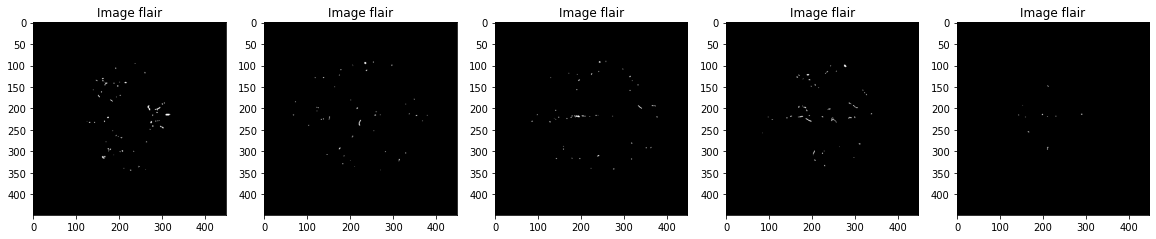

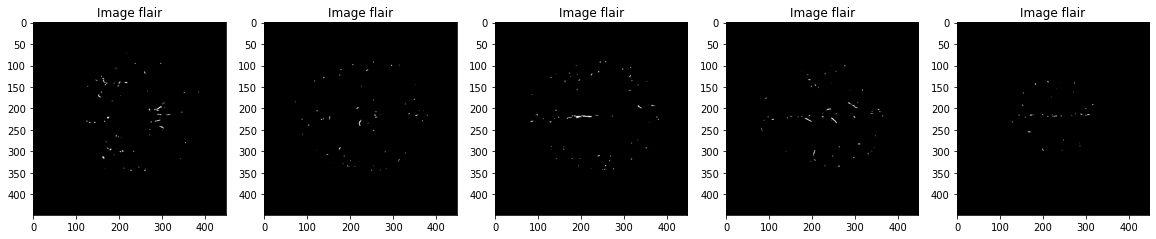

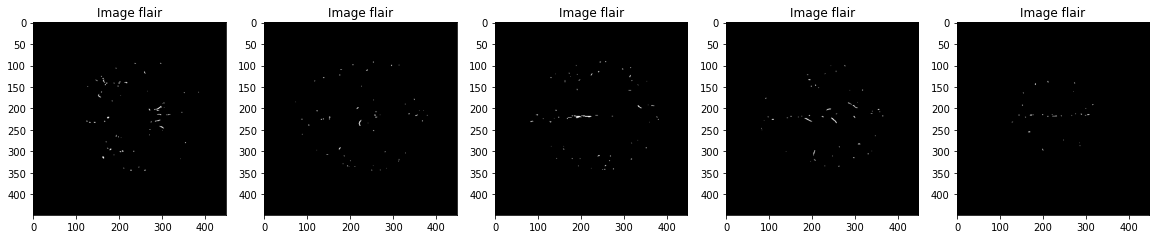

In [ ]:
dispNii(truth, 'z')
dispNii(predprob, 'z')
dispNii(predbin, 'z')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predprob1 = predprob.flatten()
predbin1 = predbin.flatten()
truth1 = truth.flatten()
cm = confusion_matrix(truth1,predbin1)
print(cm)

[[25649877    13154]
 [   11544    15537]]


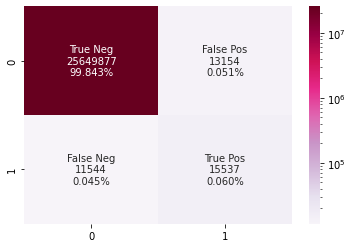

In [ ]:
import seaborn as sns
from matplotlib.colors import LogNorm
cf_matrix=[[25649877,13154],[11544, 15537]]
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [25649877,13154,11544, 15537]
group_percentages = ['99.843%','0.051%','0.045%','0.060%']
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='PuRd', norm=LogNorm()) #annot=labels

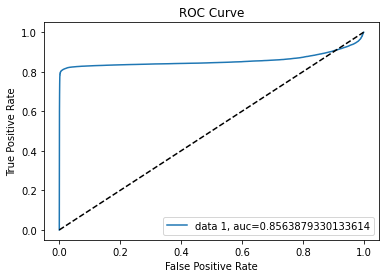

In [ ]:
fpr, tpr, thresh = metrics.roc_curve(truth1,  predprob1)
auc = metrics.roc_auc_score(truth1, predprob1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
# Import module for data visualization
from plotnine import *
import plotnine
import pandas as pd

gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresh})
index = np.argmax(gmean)
thresholdOpt = round(thresh[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
'''
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)'''

Best Threshold: 0.0 with G-Mean: 0.8953
FPR: 0.0127, TPR: 0.8118


"\nplotnine.options.figure_size = (8, 4.8)\n(\n    ggplot(data = df_fpr_tpr)+\n    geom_point(aes(x = 'FPR',\n                   y = 'TPR'),\n               size = 0.4)+\n    # Best threshold\n    geom_point(aes(x = fprOpt,\n                   y = tprOpt),\n               color = '#981220',\n               size = 4)+\n    geom_line(aes(x = 'FPR',\n                  y = 'TPR'))+\n    geom_text(aes(x = fprOpt,\n                  y = tprOpt),\n              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),\n              nudge_x = 0.14,\n              nudge_y = -0.10,\n              size = 10,\n              fontstyle = 'italic')+\n    labs(title = 'ROC Curve')+\n    xlab('False Positive Rate (FPR)')+\n    ylab('True Positive Rate (TPR)')+\n    theme_minimal()\n)"

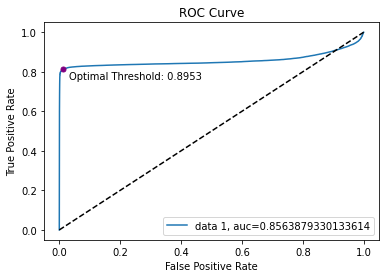

In [ ]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot(fprOpt, tprOpt, marker="o", markersize=5, markeredgecolor="purple", markerfacecolor="purple")
plt.text(fprOpt+0.02, tprOpt-0.05, "Optimal Threshold: 0.8953")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresh[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.0 with Youden J statistic: 0.8953
FPR: 0.0127, TPR: 0.8118


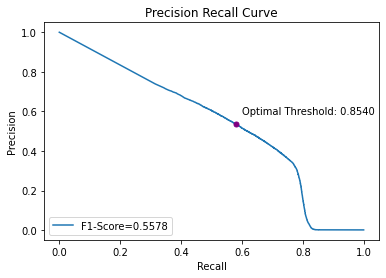

"\nplotnine.options.figure_size = (8, 4.8)\n(\n    ggplot(data = df_recall_precision)+\n    geom_point(aes(x = 'Recall',\n                   y = 'Precision'),\n               size = 0.4)+\n    geom_line(aes(x = 'Recall',\n                  y = 'Precision'))+\n    labs(title = 'Recall Precision Curve')+\n    xlab('Recall')+\n    ylab('Precision')+\n    theme_minimal()\n)"

In [ ]:
precision, recall, thresholds = precision_recall_curve(truth1, predprob1)


df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

plt.plot(recall,precision,label="F1-Score="+str(fscoreOpt))
plt.legend(loc=3)
plt.plot(recallOpt, precisionOpt, marker="o", markersize=5, markeredgecolor="purple", markerfacecolor="purple")
plt.text(recallOpt+0.02, precisionOpt+0.05, "Optimal Threshold: 0.8540") 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

'''
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)'''

In [ ]:
fscore = (2 * precision * recall) / (precision + recall)


index = np.argmax(fscore)
thresholdOpt = round(thresholds[index], ndigits = 4)
fscoreOpt = round(fscore[index], ndigits = 4)
recallOpt = round(recall[index], ndigits = 4)
precisionOpt = round(precision[index], ndigits = 4)
print('Best Threshold: {} with F-Score: {}'.format(thresholdOpt, fscoreOpt))
print('Recall: {}, Precision: {}'.format(recallOpt, precisionOpt))

Best Threshold: 0.8539999723434448 with F-Score: 0.5578
Recall: 0.5799, Precision: 0.5373


In [ ]:
print(thresh.shape)

(3878199,)
